# Keras for the movie review data (IMDB)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras import models, layers, optimizers, losses, metrics
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3, '??') for i in train_data[1]])

In [5]:
decode_review

"?? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ?? the hair is big lots of boobs ?? men wear those cut ?? shirts that show off their ?? sickening that men actually wore them and the music is just ?? trash that plays over and over again in almost every scene there is trashy music boobs and ?? taking away bodies and the gym still doesn't close for ?? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

## Data preprocessing 

In [6]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [7]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
x_val = x_train[:10000]
y_val = y_train[:10000]

x_train_part = x_train[10000:]
y_train_part = y_train[10000:]

## Building and training model 

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation= 'relu', input_shape = (10000, )))
model.add(layers.Dense(16, activation= 'relu'))
model.add(layers.Dense(1, activation= 'sigmoid'))

In [11]:
model.compile(optimizer = optimizers.RMSprop(lr=0.001), 
             loss = losses.binary_crossentropy, 
             metrics = [metrics.binary_accuracy])

In [12]:
history = model.fit(x_train_part, y_train_part, 
                   epochs = 20, 
                   batch_size = 512, 
                   validation_data= (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.5046 - binary_accuracy: 0.7798 - val_loss: 0.3735 - val_binary_accuracy: 0.8761
Epoch 2/20
15000/15000 [==============================] - 6s 420us/step - loss: 0.2952 - binary_accuracy: 0.9065 - val_loss: 0.3194 - val_binary_accuracy: 0.8762
Epoch 3/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.2190 - binary_accuracy: 0.9282 - val_loss: 0.2782 - val_binary_accuracy: 0.8892
Epoch 4/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.1733 - binary_accuracy: 0.9439 - val_loss: 0.2760 - val_binary_accuracy: 0.8905
Epoch 5/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.1406 - binary_accuracy: 0.9533 - val_loss: 0.2981 - val_binary_accuracy: 0.8823
Epoch 6/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.1154 - binary_accuracy: 0.9641 - val_loss: 0.3015 - val_bi

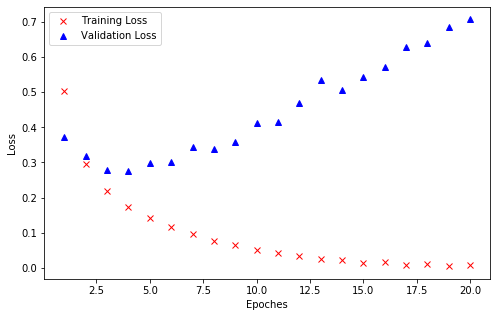

In [13]:
history_dict = history.history
epoches = range(1, 1 + 20)

loss_training = history_dict['loss']
loss_validation = history_dict['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(epoches, loss_training, 'rx')
plt.plot(epoches, loss_validation, 'b^')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()

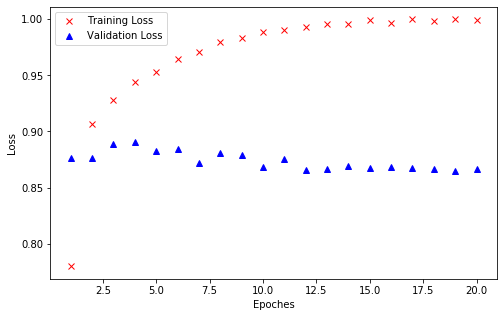

In [14]:
acc_training = history_dict['binary_accuracy']
acc_validation = history_dict['val_binary_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(epoches, acc_training, 'rx')
plt.plot(epoches, acc_validation, 'b^')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoches')
plt.ylabel('Loss')
plt.show()

## Predicting 

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.2260 - binary_accuracy: 0.9454
Epoch 2/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.1256 - binary_accuracy: 0.9612
Epoch 3/4
19456/25000 [======================>.......] - ETA: 0s - loss: 0.0897 - binary_accuracy: 0.9734

In [ ]:
results

In [ ]:
confidence = model.predict(x_test)

In [ ]:
plt.hist(confidence, bins=20, rwidth=0.9)
plt.show()